<a href="https://colab.research.google.com/github/c4bath/cf820/blob/main/cforbathMod3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, SelectKBest, chi2
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import time
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer
import scipy.stats as ss
from itertools import product


In [ ]:
# The csv file is in my google drive and shared with anyone with the link 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/820PublicData/PatSurvRaw.csv',header=0)

In [ ]:
print(data.shape)
print(list(data.columns))

(91713, 186)
['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasi

In [ ]:
pd.options.display.min_rows = 186
data.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [ ]:
# Eliminate features that do not provide any:
# 1. information value (i.e. 'encounter_id', 'patient_id', 'hospital_id') 
# 2. are the predicted probabilities from the APACHE IV model ('apache_4a_hospital_death_prob','apache_4a_icu_death_prob') 
# 3. OR are not of interest in our prediction and analysis (the physiological measures, i.e. 'bilirubin_apache','bun_apache','creatinine_apache', etc)
data.drop(['encounter_id','patient_id','readmission_status','hospital_id','icu_id','albumin_apache','apache_2_diagnosis','apache_3j_diagnosis','apache_post_operative','arf_apache','bilirubin_apache','bun_apache','creatinine_apache','fio2_apache','glucose_apache','heart_rate_apache','hematocrit_apache','map_apache','paco2_apache','paco2_for_ph_apache','pao2_apache','ph_apache','resprate_apache','sodium_apache','temp_apache','urineoutput_apache','wbc_apache','d1_diasbp_invasive_max','d1_diasbp_invasive_min','d1_diasbp_max','d1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min','d1_mbp_invasive_max','d1_mbp_invasive_min','d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_invasive_max','d1_sysbp_invasive_min','d1_sysbp_max','d1_sysbp_min','d1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min','d1_temp_max','d1_temp_min','h1_diasbp_invasive_max','h1_diasbp_invasive_min','h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min','h1_heartrate_max','h1_heartrate_min','h1_mbp_invasive_max','h1_mbp_invasive_min','h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_max','h1_mbp_noninvasive_min','h1_resprate_max','h1_resprate_min','h1_spo2_max','h1_spo2_min','h1_sysbp_invasive_max','h1_sysbp_invasive_min','h1_sysbp_max','h1_sysbp_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min','h1_temp_max','h1_temp_min','d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min','d1_bun_max','d1_bun_min','d1_calcium_max','d1_calcium_min','d1_creatinine_max','d1_creatinine_min','d1_glucose_max','d1_glucose_min','d1_hco3_max','d1_hco3_min','d1_hemaglobin_max','d1_hemaglobin_min','d1_hematocrit_max','d1_hematocrit_min','d1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min','d1_platelets_max','d1_platelets_min','d1_potassium_max','d1_potassium_min','d1_sodium_max','d1_sodium_min','d1_wbc_max','d1_wbc_min','h1_albumin_max','h1_albumin_min','h1_bilirubin_max','h1_bilirubin_min','h1_bun_max','h1_bun_min','h1_calcium_max','h1_calcium_min','h1_creatinine_max','h1_creatinine_min','h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max','h1_hematocrit_min','h1_inr_max','h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min','h1_potassium_max','h1_potassium_min','h1_sodium_max','h1_sodium_min','h1_wbc_max','h1_wbc_min','d1_arterial_pco2_max','d1_arterial_pco2_min','d1_arterial_ph_max','d1_arterial_ph_min','d1_arterial_po2_max','d1_arterial_po2_min','d1_pao2fio2ratio_max','d1_pao2fio2ratio_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max','h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min','apache_4a_hospital_death_prob','apache_4a_icu_death_prob'],axis =1, inplace = True)

In [ ]:
pd.options.display.min_rows = 186
data.isnull().sum()

hospital_death                     0
age                             4228
bmi                             3429
elective_surgery                   0
ethnicity                       1395
gender                            25
height                          1334
hospital_admit_source          21409
icu_admit_source                 112
icu_stay_type                      0
icu_type                           0
pre_icu_los_days                   0
weight                          2720
gcs_eyes_apache                 1901
gcs_motor_apache                1901
gcs_unable_apache               1037
gcs_verbal_apache               1901
intubated_apache                 715
ventilated_apache                715
aids                             715
cirrhosis                        715
diabetes_mellitus                715
hepatic_failure                  715
immunosuppression                715
leukemia                         715
lymphoma                         715
solid_tumor_with_metastasis      715
a

In [ ]:
#drop the following features (reason)
#hospital_admit_source (over 20K missing values)
data.drop(['hospital_admit_source'],axis =1, inplace = True)

In [ ]:
data.describe()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,...,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,88993.000000,89812.000000,89812.000000,90676.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,0.086302,62.309516,29.185818,0.183736,169.641588,0.835766,84.028340,3.465049,5.471195,0.009528,...,0.151223,0.325721,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,0.280811,16.775119,8.275142,0.387271,10.795378,2.487756,25.011497,0.951715,1.288376,0.097148,...,0.358268,0.468646,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,0.000000,16.000000,14.844926,0.000000,137.200000,-24.947222,38.600000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,23.641975,0.000000,162.500000,0.035417,66.800000,3.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,65.000000,27.654655,0.000000,170.100000,0.138889,80.300000,4.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,75.000000,32.930206,0.000000,177.800000,0.409028,97.100000,4.000000,6.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,67.814990,1.000000,195.590000,159.090972,186.000000,4.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#drop rows where "pre_icu_los_days" <0
data=data[data.pre_icu_los_days >=0]
data.shape

(90935, 28)

In [ ]:
# Drop rows that have 2 or more missing values
df = data
df = df[df.isnull().sum(axis=1) < 2]

In [ ]:
df.shape

(85367, 28)

In [ ]:
pd.options.display.min_rows = 186
df.isnull().sum()

hospital_death                    0
age                            3273
bmi                               0
elective_surgery                  0
ethnicity                      1137
gender                            3
height                            0
icu_admit_source                 82
icu_stay_type                     0
icu_type                          0
pre_icu_los_days                  0
weight                            0
gcs_eyes_apache                   0
gcs_motor_apache                  0
gcs_unable_apache                 0
gcs_verbal_apache                 0
intubated_apache                  0
ventilated_apache                 0
aids                              0
cirrhosis                         0
diabetes_mellitus                 0
hepatic_failure                   0
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
apache_3j_bodysystem              0
apache_2_bodysystem         

In [ ]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['age']])
df[['age']] = imputer.transform(df[['age']])
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


hospital_death                    0
age                               0
bmi                               0
elective_surgery                  0
ethnicity                      1137
gender                            3
height                            0
icu_admit_source                 82
icu_stay_type                     0
icu_type                          0
pre_icu_los_days                  0
weight                            0
gcs_eyes_apache                   0
gcs_motor_apache                  0
gcs_unable_apache                 0
gcs_verbal_apache                 0
intubated_apache                  0
ventilated_apache                 0
aids                              0
cirrhosis                         0
diabetes_mellitus                 0
hepatic_failure                   0
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
apache_3j_bodysystem              0
apache_2_bodysystem         

In [ ]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['ethnicity','icu_admit_source']])
df[['ethnicity','icu_admit_source']] = imputer.transform(df[['ethnicity','icu_admit_source']])
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


hospital_death                 0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         3
height                         0
icu_admit_source               0
icu_stay_type                  0
icu_type                       0
pre_icu_los_days               0
weight                         0
gcs_eyes_apache                0
gcs_motor_apache               0
gcs_unable_apache              0
gcs_verbal_apache              0
intubated_apache               0
ventilated_apache              0
aids                           0
cirrhosis                      0
diabetes_mellitus              0
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
dtype: int64

In [ ]:
df.describe()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,...,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.0,...,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000
mean,0.084318,62.347760,29.168879,0.182155,169.660309,0.838558,83.987972,3.460717,5.467534,0.0,...,0.148535,0.322338,0.000867,0.015826,0.226657,0.013143,0.026333,0.007157,0.004276,0.020793
std,0.277866,16.441014,8.266631,0.385974,10.793921,2.394715,24.987825,0.953982,1.290691,0.0,...,0.355632,0.467374,0.029430,0.124802,0.418671,0.113889,0.160126,0.084298,0.065249,0.142690
min,0.000000,16.000000,14.844926,0.000000,137.200000,0.000000,38.600000,1.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,23.637547,0.000000,162.500000,0.040278,66.700000,3.000000,6.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,64.000000,27.625726,0.000000,170.100000,0.143750,80.300000,4.000000,6.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,75.000000,32.906233,0.000000,177.800000,0.411111,97.070000,4.000000,6.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,67.814990,1.000000,195.590000,84.367361,186.000000,4.000000,6.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.nunique(axis=0)

hospital_death                     2
age                               75
bmi                            34243
elective_surgery                   2
ethnicity                          6
gender                             2
height                           396
icu_admit_source                   5
icu_stay_type                      3
icu_type                           8
pre_icu_los_days                8896
weight                          3378
gcs_eyes_apache                    4
gcs_motor_apache                   6
gcs_unable_apache                  1
gcs_verbal_apache                  5
intubated_apache                   2
ventilated_apache                  2
aids                               2
cirrhosis                          2
diabetes_mellitus                  2
hepatic_failure                    2
immunosuppression                  2
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
apache_3j_bodysystem              11
a

GCS - Glasgow Coma Scale - high level overview

The Glasgow Coma Scale (GCS) is used to objectively describe the extent of impaired consciousness in all types of acute medical and trauma patients. The scale assesses patients according to three aspects of responsiveness: eye-opening, motor, and verbal responses.

Best eye response (4)

1. No eye opening

2. Eye opening to pain

3. Eye opening to sound

4. Eyes open spontaneously


Best verbal response (5)

1. No verbal response

2. Incomprehensible sounds

3. Inappropriate words

4. Confused

5. Orientated


Best motor response (6)

1. No motor response.

2. Abnormal extension to pain 

3. Abnormal flexion to pain 

4. Withdrawal from pain

5. Localizing pain

6. Obeys commands

https://www.ncbi.nlm.nih.gov/books/NBK513298/#:~:text=The%20Glasgow%20Coma%20Scale%20(GCS,%2C%20motor%2C%20and%20verbal%20responses.

In [ ]:
#drop feature gcs_unable_apache (all values are the same)
df1 = df.copy()
df1.drop(['gcs_unable_apache'],axis =1, inplace = True)

In [ ]:
df1.describe()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000
mean,0.084318,62.347760,29.168879,0.182155,169.660309,0.838558,83.987972,3.460717,5.467534,3.984807,0.148535,0.322338,0.000867,0.015826,0.226657,0.013143,0.026333,0.007157,0.004276,0.020793
std,0.277866,16.441014,8.266631,0.385974,10.793921,2.394715,24.987825,0.953982,1.290691,1.564943,0.355632,0.467374,0.029430,0.124802,0.418671,0.113889,0.160126,0.084298,0.065249,0.142690
min,0.000000,16.000000,14.844926,0.000000,137.200000,0.000000,38.600000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,23.637547,0.000000,162.500000,0.040278,66.700000,3.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,64.000000,27.625726,0.000000,170.100000,0.143750,80.300000,4.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,75.000000,32.906233,0.000000,177.800000,0.411111,97.070000,4.000000,6.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,67.814990,1.000000,195.590000,84.367361,186.000000,4.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Check for class imbalance (i.e. hospital_death)
df1['hospital_death'].value_counts()

0    78169
1     7198
Name: hospital_death, dtype: int64

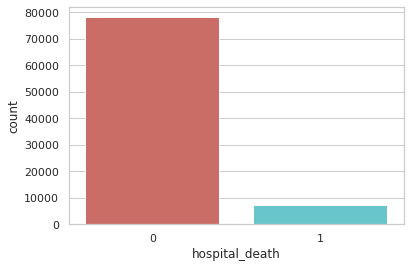

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='hospital_death',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_died = len(df1[df1['hospital_death']==0])
count_died = len(df1[df1['hospital_death']==1])
pct_of_no_died = count_no_died/(count_no_died+count_died)
print("percentage of 'patients did not die'is", pct_of_no_died*100)
pct_of_died = count_died/(count_no_died+count_died)
print("percentage of 'patients died' is", pct_of_died*100)

percentage of 'patients did not die'is 91.5681703702836
percentage of 'patients died' is 8.4318296297164


Our classes are imbalanced, and the ratio of did not die to died instances is ~ 92:~ 8

In [ ]:
df1.groupby('hospital_death').mean()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_death,,,,,,,,,,,,,,,,,,,
0,61.815710,29.249862,0.192775,169.724749,0.789598,84.283498,3.534892,5.576047,4.097916,0.130013,0.290486,0.000819,0.014264,0.228505,0.011757,0.024178,0.006371,0.003902,0.018626
1,68.125731,28.289413,0.066824,168.960497,1.370253,80.778612,2.655182,4.289108,2.756460,0.349680,0.668241,0.001389,0.032787,0.206585,0.028202,0.049736,0.015699,0.008336,0.044318


In [ ]:
pd.cut(df1['age'],bins=[16,20,30,40,50,60,70,80,np.inf])
age_groups = pd.cut(data['age'], bins=[16,20,30,40,50,60,70,80,np.inf])
pd.crosstab(age_groups, df1['hospital_death'])

hospital_death,0,1
age,,
"(16.0, 20.0]",976,24
"(20.0, 30.0]",3749,110
"(30.0, 40.0]",4656,189
"(40.0, 50.0]",7859,385
"(50.0, 60.0]",14535,982
"(60.0, 70.0]",17394,1607
"(70.0, 80.0]",16091,1875
"(80.0, inf]",10105,1516


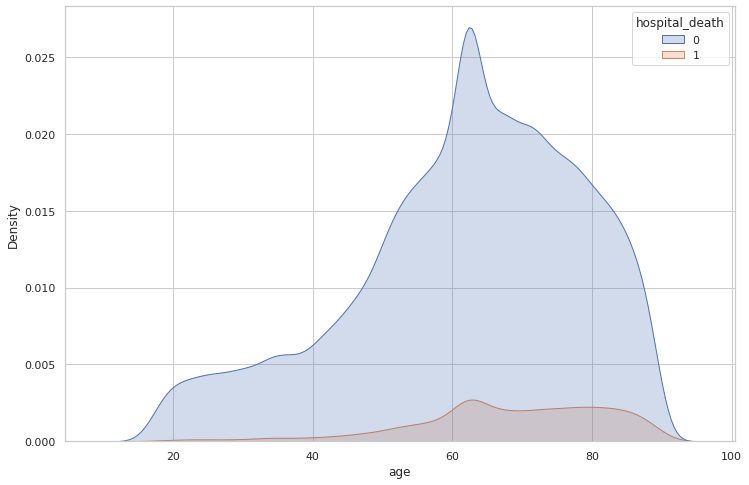

In [ ]:
# Outcome (patient died / patient did not die) density by age
plt.figure(figsize=(12,8))
sns.kdeplot(data=df1,x='age',hue='hospital_death',fill=True)

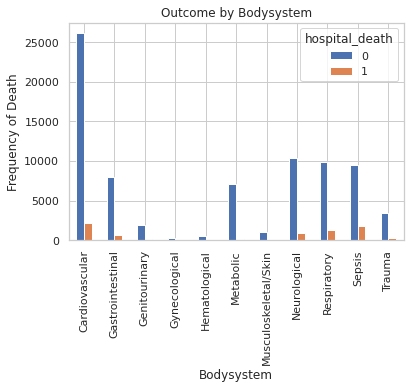

In [ ]:
# Outcome by body system
%matplotlib inline
pd.crosstab(df1.apache_3j_bodysystem ,df1.hospital_death).plot(kind='bar')
plt.title('Outcome by Bodysystem')
plt.xlabel('Bodysystem')
plt.ylabel('Frequency of Death')
plt.savefig('death_bodysystem')

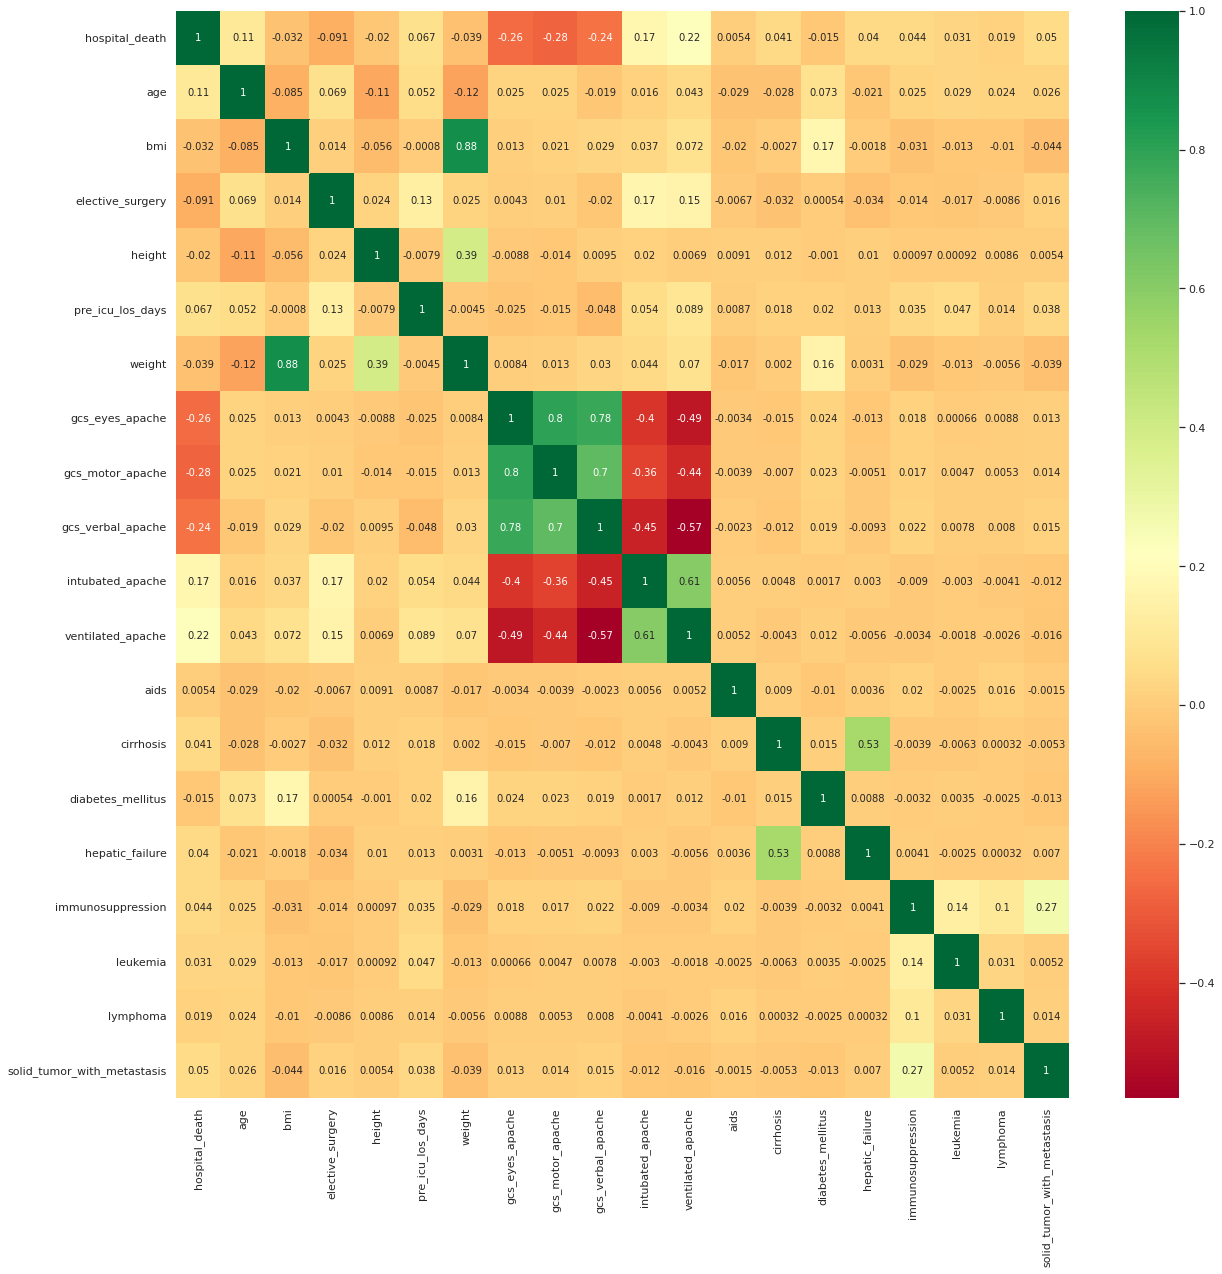

In [ ]:
#get correlations of each features in dataset

corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# List quantitative  features in descending order of correlation (absolute value) - note gcs_... are ordinal
df1[df1.columns[0:]].corr().abs()['hospital_death'][:].sort_values(ascending=False)

hospital_death                 1.000000
gcs_motor_apache               0.277058
gcs_eyes_apache                0.256233
gcs_verbal_apache              0.238185
ventilated_apache              0.224585
intubated_apache               0.171633
age                            0.106644
elective_surgery               0.090673
pre_icu_los_days               0.067375
solid_tumor_with_metastasis    0.050030
immunosuppression              0.044350
cirrhosis                      0.041241
hepatic_failure                0.040124
weight                         0.038975
bmi                            0.032284
leukemia                       0.030747
height                         0.019674
lymphoma                       0.018882
diabetes_mellitus              0.014548
aids                           0.005387
Name: hospital_death, dtype: float64

In [ ]:
matrix=df1.corr().abs()

In [ ]:
mask = np.triu(np.ones_like(matrix, dtype=bool))

reduced_matrix = matrix.mask(mask)

In [ ]:
# Find features that meet the 0.70 correlation threshold
to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > 0.7)]
# List features that meet the 0.70 correlation threshold
to_drop

['bmi', 'gcs_eyes_apache']

In [ ]:
# Drop features that meet the 0.70 correlation threshold 
df1=df1.drop(to_drop,axis=1)

In [ ]:
# Categorical features: Chi-square
# Creating a DataFrame with all categorical variables
df_cat = pd.DataFrame(data = df1.dtypes, columns = 
                                         ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var


['ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [ ]:
df_cat = df[cat_var]
df_cat.head()

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
5,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic


In [ ]:
catcols=df_cat.columns
catcols

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')

In [ ]:
cat_var1 = ('ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem')

cat_var2 = ('ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem')

cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [ ]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_var_prod:
  if i[0] != i[1]:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat[i[0]], df_cat[i[1]])))[1]))
result

[('ethnicity', 'gender', 6.918631378849475e-17),
 ('ethnicity', 'icu_admit_source', 8.77041321132468e-45),
 ('ethnicity', 'icu_stay_type', 5.979393442334206e-35),
 ('ethnicity', 'icu_type', 0.0),
 ('ethnicity', 'apache_3j_bodysystem', 1.648824159970775e-82),
 ('ethnicity', 'apache_2_bodysystem', 8.681029541768074e-76),
 ('gender', 'ethnicity', 6.918631378849426e-17),
 ('gender', 'icu_admit_source', 3.158986877629083e-23),
 ('gender', 'icu_stay_type', 0.00048239978558149097),
 ('gender', 'icu_type', 4.840052439355667e-76),
 ('gender', 'apache_3j_bodysystem', 8.967106768844737e-226),
 ('gender', 'apache_2_bodysystem', 7.135731228874272e-167),
 ('icu_admit_source', 'ethnicity', 8.77041321132468e-45),
 ('icu_admit_source', 'gender', 3.158986877629083e-23),
 ('icu_admit_source', 'icu_stay_type', 0.0),
 ('icu_admit_source', 'icu_type', 0.0),
 ('icu_admit_source', 'apache_3j_bodysystem', 0.0),
 ('icu_admit_source', 'apache_2_bodysystem', 0.0),
 ('icu_stay_type', 'ethnicity', 5.979393442334291

In [ ]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns= 'var2', values='coeff')

var2,apache_2_bodysystem,apache_3j_bodysystem,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type
var1,,,,,,,
apache_2_bodysystem,NaN,0.000000e+00,8.681030e-76,7.135731e-167,0.000000e+00,3.442488e-20,0.000000e+00
apache_3j_bodysystem,0.000000e+00,NaN,1.648824e-82,8.967107e-226,0.000000e+00,7.885567e-106,0.000000e+00
ethnicity,8.681030e-76,1.648824e-82,NaN,6.918631e-17,8.770413e-45,5.979393e-35,0.000000e+00
gender,7.135731e-167,8.967107e-226,6.918631e-17,NaN,3.158987e-23,4.823998e-04,4.840052e-76
icu_admit_source,0.000000e+00,0.000000e+00,8.770413e-45,3.158987e-23,NaN,0.000000e+00,0.000000e+00
icu_stay_type,3.442488e-20,7.885567e-106,5.979393e-35,4.823998e-04,0.000000e+00,NaN,1.227361e-214
icu_type,0.000000e+00,0.000000e+00,0.000000e+00,4.840052e-76,0.000000e+00,1.227361e-214,NaN


In [ ]:
#Categorical to One-Hot (numeric) Encoding
cat_cols=['ethnicity','gender','icu_admit_source','icu_stay_type','icu_type','gcs_motor_apache','gcs_verbal_apache','apache_3j_bodysystem','apache_2_bodysystem']

In [ ]:
# Create a copy of the data frame in memory with a different name
df_onehot=df1.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df1, columns=cat_cols, prefix = cat_cols)

df_onehot.head(10)

,hospital_death,age,elective_surgery,height,pre_icu_los_days,weight,intubated_apache,ventilated_apache,aids,cirrhosis,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0,68.0,0,180.3,0.541667,73.9,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,77.0,0,160.0,0.927778,70.2,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0,25.0,0,172.7,0.000694,95.3,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0,81.0,1,165.1,0.000694,61.7,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
5,0,67.0,0,190.5,0.000694,100.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
6,0,59.0,0,165.1,0.000694,156.6,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
9,0,50.0,0,175.3,0.060417,79.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
10,0,72.0,1,154.9,0.004861,67.8,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
11,0,80.0,1,160.0,1.271528,70.1,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
14,0,81.0,1,172.7,1.376389,113.9,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_onehot.shape

(85367, 72)

In [ ]:
X=df_onehot.drop('hospital_death', axis=1)
y=df_onehot['hospital_death']
X.shape, y.shape

((85367, 71), (85367,))

In [ ]:
y.value_counts()

0    78169
1     7198
Name: hospital_death, dtype: int64

In [ ]:
#Scale the numeric features
con_vars=['age','height','pre_icu_los_days','weight']
object= StandardScaler()
X[con_vars] = object.fit_transform(X[con_vars])
X.head(10)

,age,elective_surgery,height,pre_icu_los_days,weight,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0.343791,0,0.985717,-0.123978,-0.403718,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.891206,0,-0.894982,0.037257,-0.551791,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,-2.271635,0,0.281613,-0.349882,0.452704,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,1.134501,1,-0.422491,-0.349882,-0.891959,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
5,0.282967,0,1.930699,-0.349882,0.640797,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
6,-0.203624,0,-0.422491,-0.349882,2.905913,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
9,-0.751038,0,0.522491,-0.324943,-0.199617,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
10,0.587086,1,-1.367473,-0.348142,-0.647838,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
11,1.073677,1,-0.894982,0.180803,-0.555793,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
14,1.134501,1,0.281613,0.224592,1.197071,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Feature selection using Recursive Feature Elimination with Cross Validation and Random Forest estimator  
# create a random forest model
rf = RandomForestClassifier(random_state=42)

# Recursively eliminate features with cross validation
rfecv = RFECV(estimator=rf, cv=5, scoring='accuracy')
rfecv.fit(X, y)
X_new = rfecv.transform(X)
print("Num Features Before:", X.shape[1])
print("Num Features After:", X_new.shape[1])

Num Features Before: 71
Num Features After: 55


In [ ]:
features_kept = pd.DataFrame({'columns': X.columns,'Kept': rfecv.support_})
features_kept

,columns,Kept
0,age,True
1,elective_surgery,True
2,height,True
3,pre_icu_los_days,True
4,weight,True
5,intubated_apache,True
6,ventilated_apache,True
7,aids,False
8,cirrhosis,True
9,diabetes_mellitus,True


In [ ]:
#List the features to keep for model
X_new_df = X.iloc[:, rfecv.support_]
X_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85367 entries, 0 to 91712
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         85367 non-null  float64
 1   elective_surgery                            85367 non-null  int64  
 2   height                                      85367 non-null  float64
 3   pre_icu_los_days                            85367 non-null  float64
 4   weight                                      85367 non-null  float64
 5   intubated_apache                            85367 non-null  float64
 6   ventilated_apache                           85367 non-null  float64
 7   cirrhosis                                   85367 non-null  float64
 8   diabetes_mellitus                           85367 non-null  float64
 9   hepatic_failure                             85367 non-null  float64
 10  immunosupp

In [ ]:
X_new_df = X.iloc[:, rfecv.support_]
X_new_df.head()

,age,elective_surgery,height,pre_icu_los_days,weight,intubated_apache,ventilated_apache,cirrhosis,diabetes_mellitus,hepatic_failure,...,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Undefined diagnoses
0,0.343791,0,0.985717,-0.123978,-0.403718,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,1,0,0,0,0,0
1,0.891206,0,-0.894982,0.037257,-0.551791,0.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,-2.271635,0,0.281613,-0.349882,0.452704,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1.134501,1,-0.422491,-0.349882,-0.891959,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0.282967,0,1.930699,-0.349882,0.640797,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
rfecv.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 15,  1,  1,  1,  1,  1,  5,  1,  1,  4,
        1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  8,  1, 12,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  6,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  9, 17, 13,  1, 14,  1,  1,  1,  1,  1,  1, 11,  1,  1,  2,  1,
        7, 16,  1])

In [ ]:
print(X_new.shape, y.shape)

(85367, 55) (85367,)


In [ ]:
print("Optimum number of features: %d" % rfecv.n_features_)

Optimum number of features: 55


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


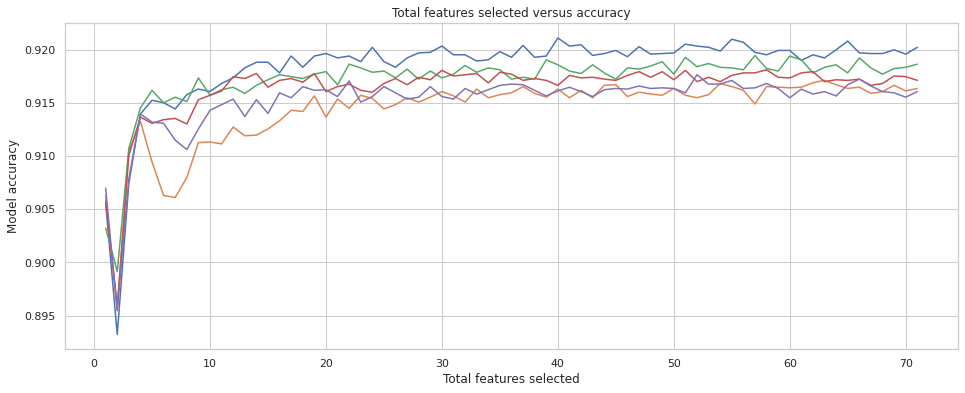

In [ ]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Model Selection and Evaluation (before addressing class imbalance)


Metric AUPRC and Average Precision

"AUPRC provides a better way for measuring model performance in those situations where you care most about finding the positive outcomes of a minority class, such as fraudulent transactions, terrorists, or diseases. It’s much more useful to us than the area under the receiver operating characteristic or AUROC (ROC/AUC) as it shows the trade off between precision and recall and it ignores true negatives.

AUPRC is much harder to interpret than AUROC because the baseline differs on every data set. A baseline random classifier will give an AUROC of 0.5, but for AUPRC the baseline is equal to the fraction of positives. Therefore, on a data set with 10% positive examples, you get a baseline AUPRC of 0.1, so scoring 0.2 would be a good score, and 0.4 excellent. On our data set, we have 492 positive examples out of 284,807 in total, so our baseline AUROC is just 0.001727. A good model could therefore have a seemingly low score.

AUPRC is a bit tricky to calculate, so most people instead calculate average precision, which is very close. Precision is the ratio of true positives over the true positives + true negatives, i.e. precision = tp / (tp + fp)."

https://practicaldatascience.co.uk/machine-learning/how-to-use-smote-for-imbalanced-classification

In [ ]:
# Classifiers to evaluate
classifiers = {
    "DummyClassifier_most_frequent": DummyClassifier(strategy='most_frequent', random_state=0),
    "LogisticRegression": LogisticRegression(solver = 'lbfgs', max_iter=1000),
    "XGBClassifier": XGBClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
}

# Classifiers to evaluate
classifiers = {
    "DummyClassifier_most_frequent": DummyClassifier(strategy='most_frequent', random_state=0),
    "LogisticRegression": LogisticRegression(solver = 'lbfgs', max_iter=1000),
    "XGBClassifier": XGBClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new_df, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [ ]:
df_models = pd.DataFrame(columns=['model', 'run_time','roc_auc','avg_pre', 'avg_pre_std'])

for key in classifiers:

    print('*',key)

    start_time = time.time()

    classifier = classifiers[key]
    model = classifier.fit(X_train, y_train)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    scorer = make_scorer(average_precision_score)
    cv_scores = cross_val_score(model, X_test, y_test, cv=5, scoring=scorer)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'roc_auc': round(roc_auc,3),
           'avg_pre': cv_scores.mean(),
           'avg_pre_std': cv_scores.std(),
    }

    df_models = df_models.append(row, ignore_index=True)

* DummyClassifier_most_frequent
* LogisticRegression
* XGBClassifier
* RandomForestClassifier
* GaussianNB


In [ ]:
df_models.head(10).sort_values(by='avg_pre')

,model,run_time,roc_auc,avg_pre,avg_pre_std
0,DummyClassifier_most_frequent,0.0,0.500,0.084300,0.000077
2,XGBClassifier,0.5,0.555,0.142854,0.013423
3,RandomForestClassifier,0.58,0.564,0.144593,0.010331
1,LogisticRegression,0.33,0.559,0.149885,0.016326
4,GaussianNB,0.01,0.720,0.173032,0.004655


In [ ]:
df_result = pd.DataFrame(columns=['model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc','avg_pre'])

classifier = GaussianNB()
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

row = {'model': 'GaussianNB without SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': round(accuracy,3),
        'precision': round(precision,3),
        'recall': round(recall,3),
        'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_pre': round(avg_precision,3),
    }

df_result = df_result.append(row, ignore_index=True)
df_result.head()

,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_pre
0,GaussianNB without SMOTE,1386,18738,4714,773,20124,5487,0.786,0.227,0.642,0.336,0.72,0.176


Text(0.5, 1.0, 'Precision-Recall curve: ~0.1760')

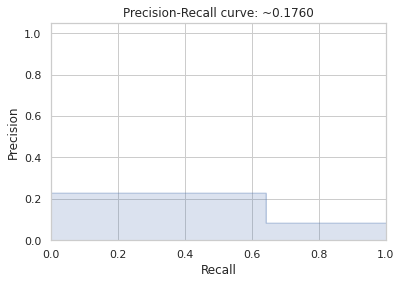

In [ ]:
avg_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: ~{0:0.4f}'.format(avg_precision))

Class Imbalance
Applying Synthetic Minority Oversampling Technique (SMOTE)

https://practicaldatascience.co.uk/machine-learning/how-to-use-smote-for-imbalanced-classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new_df, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [ ]:
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

0    54717
1    54717
Name: hospital_death, dtype: int64

In [ ]:
classifier = GaussianNB()
model = classifier.fit(X_train_smote, y_train_smote)


In [ ]:
y_pred_smote = model.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_smote).ravel()
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)
roc_auc = roc_auc_score(y_test, y_pred_smote)
avg_precision = average_precision_score(y_test, y_pred_smote)

row = {'model': 'GaussianNB with SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_pre': round(avg_precision,3),       
    }

In [ ]:
df_result = df_result.append(row, ignore_index=True)
df_result.head()

,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_pre
0,GaussianNB without SMOTE,1386,18738,4714,773,20124,5487,0.786000,0.227000,0.642000,0.33600,0.7200,0.176
1,GaussianNB with SMOTE,1554,13204,10248,605,14758,10853,0.576237,0.131673,0.719778,0.22262,0.6414,0.118


Using SMOTE to over-sample the minority class (patient died), the model performance deteriorated, with a significant increase (>2x) in the number of False Positives (patients predicted to die who did not die). 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new_df, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [ ]:
# Using SMOTE to oversample the minority class so it represents 40% of the total
oversampled = SMOTE(sampling_strategy=0.6, 
                    random_state=0,
                    k_neighbors=4)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

0    54717
1    32830
Name: hospital_death, dtype: int64

In [ ]:
undersampled = RandomUnderSampler(sampling_strategy=0.7, random_state=0)
X_train_final, y_train_final = undersampled.fit_resample(X_train_smote, y_train_smote)

In [ ]:
y_train_final.value_counts()

0    46900
1    32830
Name: hospital_death, dtype: int64

In [ ]:
classifier = GaussianNB()
model = classifier.fit(X_train_final, y_train_final)

In [ ]:
y_pred_smote = model.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_smote).ravel()
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)
roc_auc = roc_auc_score(y_test, y_pred_smote)
avg_precision = average_precision_score(y_test, y_pred_smote)

row = {'model': 'GaussianNB with under/over',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_pre': round(avg_precision,3),       
    }

In [ ]:
df_result = df_result.append(row, ignore_index=True)
df_result.tail(20)

,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_pre
0,GaussianNB without SMOTE,1386,18738,4714,773,20124,5487,0.786000,0.227000,0.642000,0.336000,0.720000,0.176
1,GaussianNB with SMOTE,1554,13204,10248,605,14758,10853,0.576237,0.131673,0.719778,0.222620,0.641400,0.118
2,GaussianNB with under/over,1590,13655,9797,569,15245,10366,0.595252,0.139633,0.736452,0.234756,0.659353,0.125


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new_df, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [ ]:
oversampled = BorderlineSMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

0    54717
1    54717
Name: hospital_death, dtype: int64

In [ ]:
classifier = GaussianNB()
model = classifier.fit(X_train_smote, y_train_smote)

In [ ]:
y_pred_smote = model.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_smote).ravel()
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)
roc_auc = roc_auc_score(y_test, y_pred_smote)
avg_precision = average_precision_score(y_test, y_pred_smote)

row = {'model': 'GaussianNB with Borderline SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_pre': round(avg_precision,3),       
    }

In [ ]:
df_result = df_result.append(row, ignore_index=True)
df_result.head()

,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_pre
0,GaussianNB without SMOTE,1386,18738,4714,773,20124,5487,0.786000,0.227000,0.642000,0.336000,0.720000,0.176
1,GaussianNB with SMOTE,1554,13204,10248,605,14758,10853,0.576237,0.131673,0.719778,0.222620,0.641400,0.118
2,GaussianNB with under/over,1590,13655,9797,569,15245,10366,0.595252,0.139633,0.736452,0.234756,0.659353,0.125
3,GaussianNB with Borderline SMOTE,1580,13074,10378,579,14654,10957,0.572176,0.132129,0.731820,0.223844,0.644650,0.119


Text(0.5, 1.0, 'Precision-Recall curve: ~0.1193')

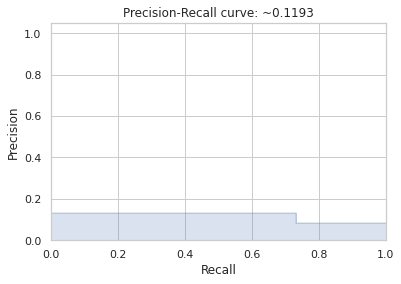

In [ ]:
avg_precision = average_precision_score(y_test, y_pred_smote)
precision, recall, _ = precision_recall_curve(y_test, y_pred_smote)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: ~{0:0.4f}'.format(avg_precision))